# Keras ile Zaman Serileri

Zaman serisi kodlama, zamanla meydana gelen olayların bir sinir ağında temsil edilmesiyle ilgilenmektedir. Zamanla bir sinir ağında oluşan verileri kodlamanın birçok farklı yöntemi vardır. Bu kodlama gereklidir çünkü ileri beslemeli bir sinir ağı, belirli bir giriş vektörü için her zaman aynı çıktı vektörünü üretecektir. Tekrarlayan sinir ağları, zaman serisi verilerinin kodlanmasını gerektirmez, çünkü zaman içinde oluşan verileri otomatik olarak işleyebilirler.</br>

Hafta boyunca sıcaklıktaki değişim, zaman serisi verilerine bir örnektir. Örneğin, bugünün sıcaklığının 25 derece ve yarının sıcaklığının 27 derece olduğunu bilirsek, tekrarlayan sinir ağları ve zaman serisi kodlaması, hafta için doğru sıcaklığı tahmin etmek için başka bir seçenek sunar. Tersine, geleneksel bir ileri beslemeli sinir ağı, verilen bir girdi için her zaman aynı çıktıyla yanıt verecektir. Yarının sıcaklığını tahmin etmek için ileri beslemeli bir sinir ağını eğitirsek, 25 için 27 değerini döndürmelidir. 25 verildiğinde her zaman 27 çıktı vermesi, tahminlerine engel olabilir. Elbette 27 ° C'lik sıcaklık her zaman 25'i takip etmeyecektir. Sinir ağının tahmin öncesinde bir dizi gün boyunca sıcaklıkları göz önünde bulundurması daha iyi olacaktır. Belki de geçen haftadaki sıcaklık, yarının sıcaklığını tahmin etmemize izin verebilir. Bu nedenle, tekrarlayan sinir ağları ve zaman serisi kodlaması, verileri zaman içinde bir sinir ağında temsil etmek için iki farklı yaklaşımı temsil eder.</br>



In [1]:
# 1= Satın Al -1 = Sat 0= Elinde Tut

X= [[32], [41], [39], [20], [15]]
y = [1, -1, 0, -1, 1]
print(X)
print(y)

[[32], [41], [39], [20], [15]]
[1, -1, 0, -1, 1]


In [4]:
import pandas as pd
import numpy as np

X = np.array(X)
print(X[:,0])

df = pd.DataFrame({'x': X[:, 0], 'y': y})
df

[32 41 39 20 15]


,x,y
0,32,1
1,41,-1
2,39,0
3,20,-1
4,15,1


In [5]:
X= [[32, 1383], [41, 2928], [39, 8823], [20,1252], [15, 1532]]
y = [1, -1, 0, -1, 1]
print(X)
print(y)

[[32, 1383], [41, 2928], [39, 8823], [20, 1252], [15, 1532]]
[1, -1, 0, -1, 1]


In [6]:
X = np.array(X)

df = pd.DataFrame({'price': X[:, 0], 'stock': X[:,1], 'y': y})
df

,price,stock,y
0,32,1383,1
1,41,2928,-1
2,39,8823,0
3,20,1252,-1
4,15,1532,1


# Keras ve TensorFlow ile LSTM

Şimdiye kadar incelenen sinir ağlarının her zaman ileri bağlantıları vardı. Bu türden sinir ağları her zaman ilk gizli katmana bağlı bir giriş katmanıyla başlar. Her gizli katman her zaman bir sonraki gizli katmana bağlanır. Son gizli katman her zaman çıktı katmanına bağlanır. Katmanları bu şekilde bağlamak, bu ağların "ileri besleme" olarak adlandırılmasının sebebidir. Tekrarlayan sinir ağları, geriye doğru bağlantılara da izin verildiği için o kadar katı değildir. Tekrarlayan bir bağlantı, bir katmandaki bir nöronu önceki bir katmana veya nöronun kendisine bağlar. Yinelenen sinir ağı mimarilerinin çoğu, yinelenen bağlantılarda durumu korur. İleri beslemeli sinir ağları herhangi bir durumu korumaz. Tekrarlayan bir sinir ağının durumu, sinir ağı için bir tür kısa süreli hafıza görevi görür. Sonuç olarak, tekrarlayan bir sinir ağı, belirli bir girdi için her zaman aynı çıktıyı üretmeyecektir.</br>

Tekrarlayan sinir ağları, bağlantıları yalnızca bir katmandan diğerine, giriş katmanından çıktı katmanına akmaya zorlamaz. Tekrarlayan bir bağlantı, bir nöron ile aşağıdaki diğer nöron türlerinden biri arasında bir bağlantı kurulduğunda meydana gelir:

<li>Nöronun kendisi</li> 
<li>Aynı seviyede bir nöron</li> 
<li>Önceki seviyedeki bir nöron</li>

Tekrarlayan bağlantılar asla giriş nöronlarını veya bias nöronları hedefleyemez. Tekrarlayan bağlantıların işlenmesi zor olabilir. Yinelenen bağlantılar sonsuz döngüler oluşturduğundan, sinir ağının ne zaman duracağını bilmek için bir yolu olmalıdır. Sonsuz bir döngüye giren bir sinir ağı yararlı olmayacaktır. Sonsuz döngüleri önlemek için, tekrarlayan bağlantılar aşağıdaki üç yaklaşımla hesaplanabilir:</br>

<li>Context neurolar</li>
<li>Sabit sayıda yineleme üzerinden çıktı hesaplama</li>
<li>Nöron çıkışı stabilize olana kadar çıktı hesaplama</li>

Context nöronu, girişini hatırlayan ve ağı bir sonraki hesaplamamızda bu girişi çıktı olarak kullanmayı sağlayan özel bir nöron türüdür. Örneğin, girdi olarak bir context nöronuna 0.5 verilirse, çıktı olarak 0 verir. Context nöronları ilk çağrılarında her zaman 0 çıktısı verirler.

Bağlam nöronları, tek bir ileri besleme geçişinde bir sinir ağını hesaplamaya izin verir. Bağlam nöronları genellikle katmanlar halinde oluşur. Şekilde gösterildiği gibi, bağlam nöronlarının bir katmanı, kaynak katmanındaki nöronlarla her zaman aynı sayıda bağlam nöronuna sahip olacaktır.

<img src='context.png'/>
<center>Context Layers(Kaynak : Jeff Heaton, Applications of Deep Neural Networks)</center></br>

Yukarıdaki katmandan da görüldüğü gibi, Hidden1 ve Hidden2 olarak etiketlenen iki gizli nöron, iki context nörona doğrudan bağlanır. Bu bağlantıların üzerindeki kesik çizgiler, bunların ağırlıklı bağlantılar olmadığını gösterir. Bu ağırlıksız bağlantılar asla dense değildir. Bu bağlantılar dense olsaydı, Hidden1 olan hem Hidden1 hem de Hidden2'ye bağlanırdı. Bununla birlikte, doğrudan bağlantı, gizli nöronu, karşılık gelen context nöronuna birleştirir. İki context nöronu, iki gizli nörona dense, ağırlıklı bağlantılar oluşturur. Son olarak, iki gizli nöron, bir sonraki katmandaki nöronlarla da dense bağlantılar oluşturur. </br>

# LSTM

Long Short Term Neural Network (LSTM) katmanları, genellikle derin sinir ağlarıyla kullanılan bir tür tekrarlayan birimdir. TensorFlow için, LSTM, dense gibi diğer katman türleriyle birleştirilebilen bir katman türü olarak düşünülebilir. LSTM, dahili olarak iki transfer fonksiyonu tipini kullanır.</br>

İlk transfer fonksiyonu türü sigmoiddir. Bu transfer fonksiyonu tipi, ünitenin içindeki kapılarda kullanılır. Sigmoid transfer fonksiyonu aşağıdaki denklemde verilmiştir:

<img src='lstm1.png'/>

İkinci tip transfer fonksiyonu, LSTM'nin çıkışını ölçeklendiren hiperbolik tanjant (tanh) fonksiyonudur.

Sigmoid


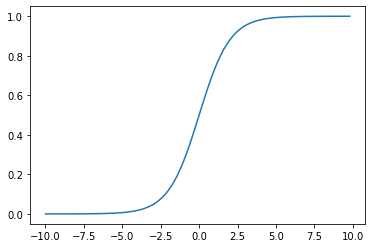

Tanh


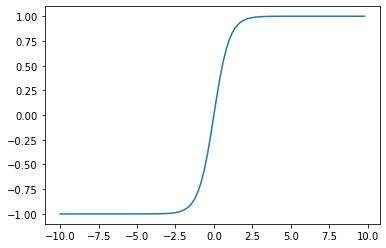

In [11]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(-10, 10, 0.2)
sigmoid = [1 / (1 + np.exp(-item)) for item in x]
tanh = [np.tanh(item) for item in x]

print('Sigmoid')
plt.plot(x, sigmoid)
plt.show()

print('Tanh')
plt.plot(x, tanh)
plt.show()

Bu iki fonksiyonun her ikisi de çıktılarını belirli bir aralığa sıkıştırır. Sigmoid fonksiyonu için bu aralık 0 ile 1 iken, hiperbolik tanjant için  -1 ile 1'dir.</br>

LSTM, dahili bir durumu korur ve bir çıktı üretir. Aşağıdaki şekil, üç zaman dilimi üzerinden bir LSTM birimini göstermektedir: Şekilde gösterildiği gibi, mevcut zaman dilimi (t), önceki zaman dilimi (t-1) ve sonraki zaman dilimi (t + 1) dir.<br>

<img src='lstm2.png'/>
<center>LSTM Layers(Kaynak : Jeff Heaton, Applications of Deep Neural Networks)</center></br>

y üssü değerleri üniteden alınan çıktıdır; x değerleri birimin girdisidir ve c değerleri context değerleridir. Çıktı ve context değerleri her zaman çıktılarını sonraki zaman dilimine besler. Bağlam değerleri, ağın aramalar arasında durumu korumasına izin verir. Aşağıdaki şekil, bir LSTM katmanının iç yapısını göstermektedir.</br>


<img src='lstm3.png'/>
<center>Bir LSTM Layer'ın İç Yapısı(Kaynak : Jeff Heaton, Applications of Deep Neural Networks)</center></br>

Bir LSTM birimi üç kapıdan oluşur.

<li>Forget Gate : Context'in  unutulup unutulmadığını kontrol eder</li>
<li>Input Gate: Context'in bir değeri hatırlayıp hatırlamayacağını / ne zaman hatırlayacağını kontrol eder.</li>
<li>Output Gate : Hatırlanan değerin birimden geçmesine izin verilip verilmediğini kontrol eder.</li>


In [1]:
# http://www.sidc.be/silso/INFO/sndtotcsv.php
import pandas as pd


names = ['year', 'month', 'day', 'dec_year', 'sn_value', 'sn_error', 'obs_num']

df = pd.read_csv('SN_d_tot_V2.0.csv', header=None, names=names, na_values=['-1'], index_col=False,
                sep=';')
df.head()

,year,month,day,dec_year,sn_value,sn_error,obs_num
0,1818,1,1,1818.001,-1,NaN,0
1,1818,1,2,1818.004,-1,NaN,0
2,1818,1,3,1818.007,-1,NaN,0
3,1818,1,4,1818.010,-1,NaN,0
4,1818,1,5,1818.012,-1,NaN,0


In [2]:
df.tail()

,year,month,day,dec_year,sn_value,sn_error,obs_num
74260,2021,4,26,2021.316,50,8.0,49
74261,2021,4,27,2021.319,55,7.5,45
74262,2021,4,28,2021.322,46,8.1,41
74263,2021,4,29,2021.325,37,6.9,29
74264,2021,4,30,2021.327,29,7.2,39


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,74265.0,1919.165758,58.697068,1818.000,1868.000,1919.000,1970.000,2021.000
month,74265.0,6.516475,3.450009,1.000,4.000,7.000,10.000,12.000
day,74265.0,15.729173,8.799934,1.000,8.000,16.000,23.000,31.000
dec_year,74265.0,1919.665215,58.696837,1818.001,1868.832,1919.667,1970.497,2021.327
sn_value,74265.0,78.733737,77.425724,-1.000,15.000,57.000,123.000,528.000
sn_error,71018.0,7.252605,4.579123,0.000,3.400,6.800,10.200,77.700
obs_num,74265.0,4.681519,8.431966,0.000,1.000,1.000,1.000,69.000


In [3]:
df = df[df.obs_num != 0]
df

,year,month,day,dec_year,sn_value,sn_error,obs_num
7,1818,1,8,1818.021,65,10.2,1
12,1818,1,13,1818.034,37,7.7,1
16,1818,1,17,1818.045,77,11.1,1
17,1818,1,18,1818.048,98,12.6,1
18,1818,1,19,1818.051,105,13.0,1
...,...,...,...,...,...,...,...
74260,2021,4,26,2021.316,50,8.0,49
74261,2021,4,27,2021.319,55,7.5,45
74262,2021,4,28,2021.322,46,8.1,41
74263,2021,4,29,2021.325,37,6.9,29


In [4]:
df.sn_value = df.sn_value.astype('float')
df

,year,month,day,dec_year,sn_value,sn_error,obs_num
7,1818,1,8,1818.021,65.0,10.2,1
12,1818,1,13,1818.034,37.0,7.7,1
16,1818,1,17,1818.045,77.0,11.1,1
17,1818,1,18,1818.048,98.0,12.6,1
18,1818,1,19,1818.051,105.0,13.0,1
...,...,...,...,...,...,...,...
74260,2021,4,26,2021.316,50.0,8.0,49
74261,2021,4,27,2021.319,55.0,7.5,45
74262,2021,4,28,2021.322,46.0,8.1,41
74263,2021,4,29,2021.325,37.0,6.9,29


In [6]:
df_train = df[df.year < 2000]
df_test = df[df.year > 2000]

In [7]:
spots_train = df_train.sn_value.tolist()
spots_test = df_test.sn_value.tolist()

print('Train set uzunluk = ',  len(spots_train))
print('Test set uzunluk = ',  len(spots_test))

Train set uzunluk =  63227
Test set uzunluk =  7425


In [8]:
import numpy as np

def to_sequence(seq_size, obs):
    X = []
    y = []
    
    for i in range(len(obs) - SEQUENCE_SIZE):
        window = obs[i:(i + SEQUENCE_SIZE)]
        after_window = obs[i + SEQUENCE_SIZE]
        window = [[x] for x in window]
        X.append(window)
        y.append(after_window)
        
    return np.array(X), np.array(y)

SEQUENCE_SIZE = 10
X_train, y_train = to_sequence(SEQUENCE_SIZE, spots_train)
X_test, y_test = to_sequence(SEQUENCE_SIZE, spots_test)

In [9]:
X_train[0]

array([[ 65.],
       [ 37.],
       [ 77.],
       [ 98.],
       [105.],
       [ 25.],
       [ 38.],
       [ 20.],
       [ 17.],
       [ 20.]])

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()
model.add(LSTM(64, dropout=0.0, recurrent_dropout=0.0, input_shape=(None, 1)))
model.add(Dense(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer = 'adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
                       restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[monitor], verbose=1, epochs=7)

Epoch 1/7
1976/1976 [==============================] - 36s 18ms/step - loss: 1276.2633 - val_loss: 178.0600
Epoch 2/7
1976/1976 [==============================] - 39s 20ms/step - loss: 579.0024 - val_loss: 175.5081
Epoch 3/7
1976/1976 [==============================] - 45s 23ms/step - loss: 574.1948 - val_loss: 162.4024
Epoch 4/7
1976/1976 [==============================] - 38s 19ms/step - loss: 567.2704 - val_loss: 166.5420
Epoch 5/7
1976/1976 [==============================] - 37s 19ms/step - loss: 565.2506 - val_loss: 168.4906
Epoch 6/7
1976/1976 [==============================] - 41s 21ms/step - loss: 568.2023 - val_loss: 177.0620
Epoch 7/7
1976/1976 [==============================] - 46s 23ms/step - loss: 563.7004 - val_loss: 169.2416


In [10]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

NameError: name 'model' is not defined